In [1]:
import cv2
import pytesseract
import os
os.chdir(r'E:\ElectroPi\Egyption National card id')

pytesseract.pytesseract.tesseract_cmd=r'E:\ElectroPi\Egyption National card id\tesseract\tesseract.exe'

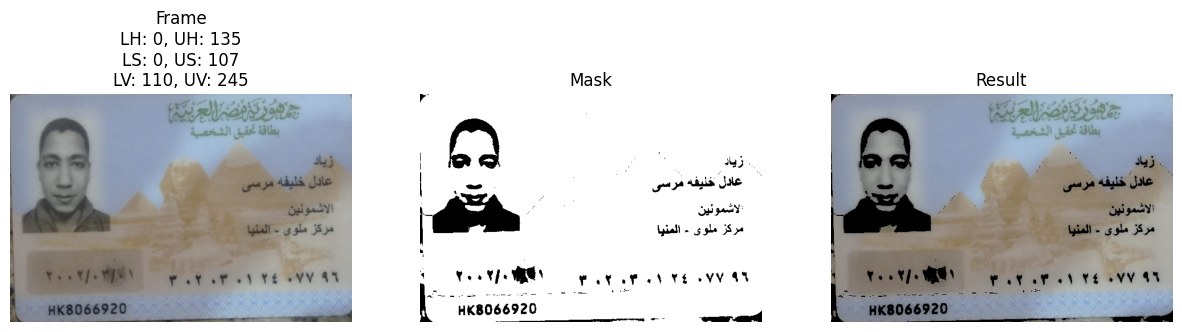

##########################################
Recognized Text: / ١ ‏زياد‎

علال خليفه مرسى

الاشمونين :
مركز ملوى - المنيا

لي ل ل ا | ال

2200020
سم 6

اللكيلنا

 

##########################################
Final DataFrame:
  LH   UH LS   US   LV   UV                                    Recognized Text
0  0  135  0  107  110  245  / ١ ‏زياد‎\n\nعلال خليفه مرسى\n\nالاشمونين :\n...


In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd

# Function to get manual input values
def get_manual_values():
    lh = int(input("Enter LH value (0-255): "))
    uh = int(input("Enter UH value (0-255): "))
    ls = int(input("Enter LS value (0-255): "))
    us = int(input("Enter US value (0-255): "))
    lv = int(input("Enter LV value (0-255): "))
    uv = int(input("Enter UV value (0-255): "))
    return lh, uh, ls, us, lv, uv

# Initialize an empty DataFrame to store the values
df = pd.DataFrame(columns=['LH', 'UH', 'LS', 'US', 'LV', 'UV', 'Recognized Text'])

while True:
    frame = cv2.imread('1.jpeg', 1)

    # Check if the image is loaded successfully
    if frame is None:
        print("Error: Image not found")
        break

    # Specify the new dimensions
    new_width = 600
    new_height = 400

    # Resize the image
    frame = cv2.resize(frame, (new_width, new_height))

    # Get manual input values
    lh, uh, ls, us, lv, uv = get_manual_values()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_region = np.array([lh, ls, lv])
    upper_region = np.array([uh, us, uv])
    mask = cv2.inRange(hsv, lower_region, upper_region)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Convert images from BGR to RGB format for Matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    res_rgb = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

    # Display the original frame, mask, and result using Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(frame_rgb)
    axs[0].set_title(f'Frame\nLH: {lh}, UH: {uh}\nLS: {ls}, US: {us}\nLV: {lv}, UV: {uv}')
    axs[0].axis('off')

    axs[1].imshow(mask_rgb)
    axs[1].set_title('Mask')
    axs[1].axis('off')

    axs[2].imshow(res_rgb)
    axs[2].set_title('Result')
    axs[2].axis('off')

    plt.show()

    text = pytesseract.image_to_string(mask, lang='ara')

    # Print the recognized text
    print('##########################################')
    print("Recognized Text:", text)
    print('##########################################')

    # Create a new DataFrame with the current values
    new_data = pd.DataFrame([{'LH': lh, 'UH': uh, 'LS': ls, 'US': us, 'LV': lv, 'UV': uv, 'Recognized Text': text}])

    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, new_data], ignore_index=True)

    # Ask user if they want to continue or quit
    button = input("Press 'q' to quit or Enter to continue: ")

    if button == 'q':
        break

# Print the final DataFrame
print("Final DataFrame:")
print(df)

cv2.destroyAllWindows()
